<a href="https://colab.research.google.com/github/etwalsaado/Student_Infineon_Projects/blob/main/01_data_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Ready — pandas:", pd.__version__)


Ready — pandas: 2.2.2


In [2]:
dates = pd.date_range(start='2020-01-01', periods=365, freq='D')
consumption = 50 + 10*np.sin(2*np.pi*dates.dayofyear/365) + np.random.normal(0,3,size=len(dates))
temp = 20 + 5*np.sin(2*np.pi*dates.dayofyear/365) + np.random.normal(0,2,size=len(dates))
df = pd.DataFrame({'date': dates, 'consumption': consumption.round(2), 'temp': temp.round(2)})
df.to_csv('energy_sample.csv', index=False)
print("Saved energy_sample.csv (365 rows).")
df.head()


Saved energy_sample.csv (365 rows).


,date,consumption,temp
0,2020-01-01,51.24,20.08
1,2020-01-02,53.70,20.61
2,2020-01-03,49.01,20.65
3,2020-01-04,50.06,17.12
4,2020-01-05,55.24,20.89


In [3]:
# Cell 3 - نقرأ الملف اللي أنشأناه في الخلية 2
import pandas as pd

fname = 'energy_sample.csv'  # نستخدم الملف اللي عملناه قبل شوي
df = pd.read_csv(fname, parse_dates=['date'])

# نعرض أول 5 صفوف من الجدول
df.head()


,date,consumption,temp
0,2020-01-01,51.24,20.08
1,2020-01-02,53.70,20.61
2,2020-01-03,49.01,20.65
3,2020-01-04,50.06,17.12
4,2020-01-05,55.24,20.89


,consumption,temp
count,365.000000,365.000000
mean,50.032521,19.976411
std,7.640281,4.125690
min,34.340000,10.080000
25%,43.530000,16.650000
50%,49.680000,20.050000
75%,56.480000,23.580000
max,67.640000,28.740000


/tmp/ipython-input-424314137.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['consumption'].resample('M').mean()


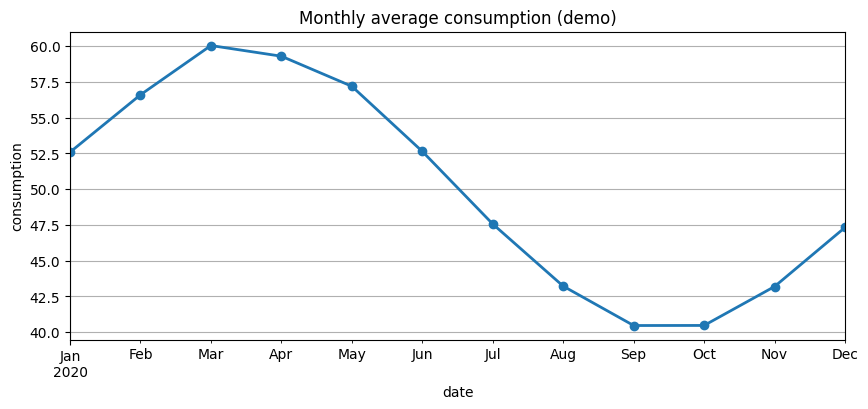

Saved cleaned.csv


In [5]:
# Cell 4 - تنظيف بسيط وEDA
# تأكدي أن العمود date موجود وتحويله للتاريخ
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])  # لو في تواريخ غير صحيحة
    df.set_index('date', inplace=True)

# وصف رقمي
display(df.describe())

# مثال: متوسط شهري للاستهلاك
if 'consumption' in df.columns:
    monthly = df['consumption'].resample('M').mean()
    plt.figure(figsize=(10,4))
    monthly.plot(marker='o', linewidth=2)
    plt.title('Monthly average consumption (demo)')
    plt.ylabel('consumption')
    plt.grid(True)
    plt.show()

# احفظ نسخة نظيفة
df.reset_index().to_csv('cleaned.csv', index=False)
print("Saved cleaned.csv")
